In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import chi2_contingency
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
# loading the data
df = pd.read_csv('BankChurners.csv')
print("Number of datapoints:", len(df))
df.head()

Number of datapoints: 10127


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### About the Data
The dataset consists of 10127 data-points and 23 attributes It can be categorized into the following subsets

**Customer Information**
    CLIENTNUM (Identifier)

    Customer_Age

    Gender

    Dependent_count

    Education_Level

    Marital_Status

    Income_Category

**Card and Account Information**

    Attrition_Flag

    Card_Category

    Months_on_book

    Total_Relationship_Count

    Months_Inactive_12_mon

    Contacts_Count_12_mon

    Credit_Limit

    Total_Revolving_Bal

    Avg_Open_To_Buy

    Avg_Utilization_Ratio

**Transaction Information**

    Total_Amt_Chng_Q4_Q1

    Total_Trans_Amt

    Total_Trans_Ct

    Total_Ct_Chng_Q4_Q1

**Classifier (Not typically used in analysis)**

    Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
    Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

From the above output, we can observe that the last two column names are too long. It would be better to make them shorter.

In [4]:
# The last two columns are too long, so let's make them shorter.
df.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1':'Naive_Bayes_mon_1',
                  'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2':'Naive_Bayes_mon_2'},inplace=True)

### Data Cleaning 

In [5]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Naive_Bayes_mon_1           0
Naive_Bayes_mon_2           0
dtype: int64

0 missing values in all the columns

### EDA (Exploratory Data Analysis)

In [6]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_mon_1,Naive_Bayes_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


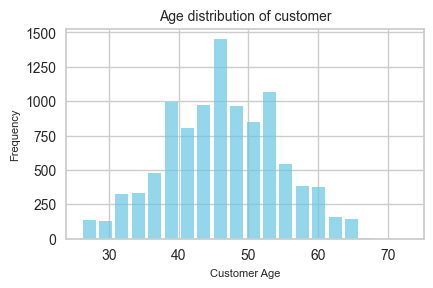

In [7]:
# Let's check the distribution of customer ages. 
plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 1)
df['Customer_Age'].plot.hist(rwidth=0.8, bins=20, color='#67C6E3', alpha=0.7)
plt.xlabel("Customer Age", fontsize=8)
plt.ylabel("Frequency", fontsize=8)
plt.title("Age distribution of customer", fontsize=10)
plt.tight_layout()
plt.show()

We can observe that the most occurring age is 44, with 500 customers at this age. Ages above 66 occur 1 or 2 times. The ages with the highest frequency are between 44 and 50, with the frequency decreasing as the age moves away from that range. The ages with the lowest frequency are below 30 and above 66.

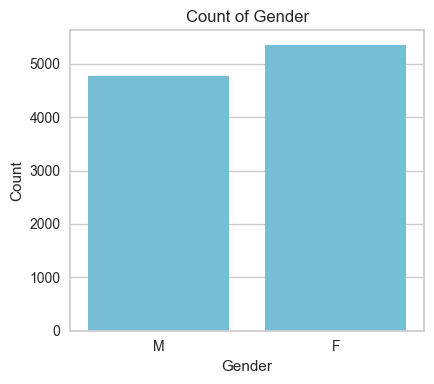

In [8]:
# Male Vs Female 
plt.figure(figsize=(4.5, 4))
ax = sns.countplot(data=df, 
                   x='Gender', 
                   color='#67C6E3')
                   
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Gender')
plt.tight_layout()
plt.show()

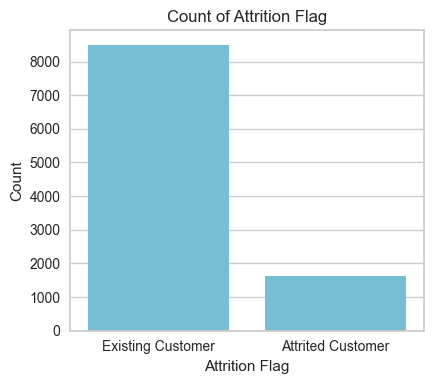

In [9]:
# Existing Customer VS. Attrited Customer
plt.figure(figsize=(4.5, 4))
ax = sns.countplot(data=df, 
                   x='Attrition_Flag', 
                   color='#67C6E3')
                   
plt.xlabel('Attrition Flag')
plt.ylabel('Count')
plt.title('Count of Attrition Flag')
plt.tight_layout()
plt.show()

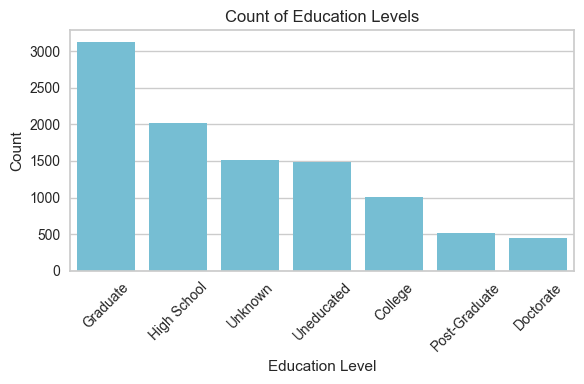

In [10]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, 
                   x='Education_Level', 
                   color='#67C6E3',
                   order=df['Education_Level'].value_counts().index)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Count of Education Levels')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

We can observe that the most common education level is 'graduate' with 3128 customers. The categories 'post-graduate' and 'doctorate' both have fewer than 500 customers. Therefore, we can observe that there are fewer highly educated customers. Most of the customers are 'graduate', so we should focus on them.

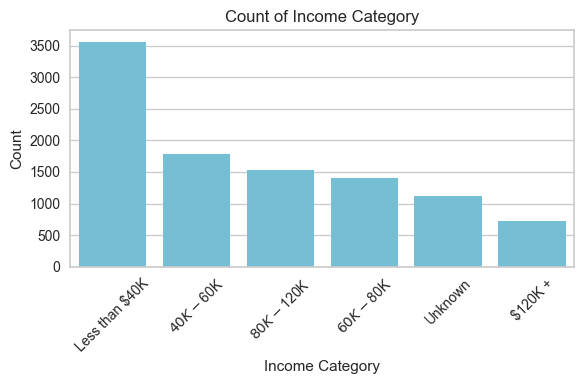

In [11]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df,
                   x='Income_Category', 
                   color='#67C6E3',
                   order=df['Income_Category'].value_counts().index)
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.title('Count of Income Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

We can observe that the most common income category is 'Less than $40K', with a customer count of 3561.

Is there any relation between income category and education level?

The Chi-Square test is used to determine whether there is a significant association between two categorical variables.

This is done using hypotheses:

    - Null hypothesis (Ho): There is no association between the Income_Category and Education_Level (they are independent).
    - Alternative hypothesis (H1): There is an association between the Income_Category and Education_Level (they are dependent).

- If the p-value is less than a chosen significance level (e.g., 0.05), you can reject the null hypothesis and conclude that there is a significant relationship between the two variables.

- If the p-value is greater than the chosen significance level (e.g., 0.05), you fail to reject the null hypothesis, indicating that there is no significant relationship.

In [12]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df['Income_Category'], df['Education_Level']) 

# using Chi-Square 
chi2, p, dof, expected = chi2_contingency(cross_tab)
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

Chi-Square Statistic: 45.25368499626264
p-value: 0.03655347346001112


- The Chi-Square Statistic value indicates a strong association between Income_Category and Education_Level.
- The p-value (0.0366) is less than the significance level of 0.05. Therefore, we have enough evidence to reject the null hypothesis.
Since we reject the null hypothesis, we can conclude that there is a statistically significant relationship between "Income Category" and "Education Level.

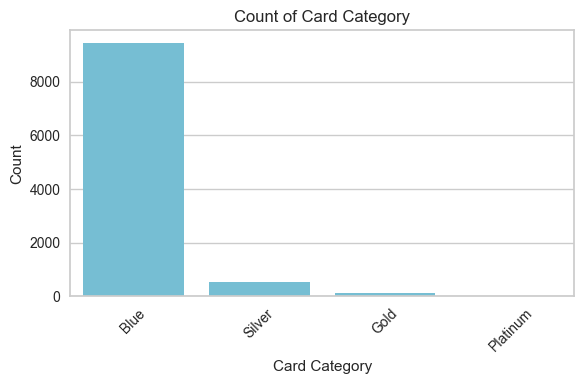

In [13]:
# What type of card are most used?
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, 
                   x='Card_Category', 
                   color='#67C6E3',
                   order=df['Card_Category'].value_counts().index)
plt.xlabel('Card Category')
plt.ylabel('Count')
plt.title('Count of Card Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

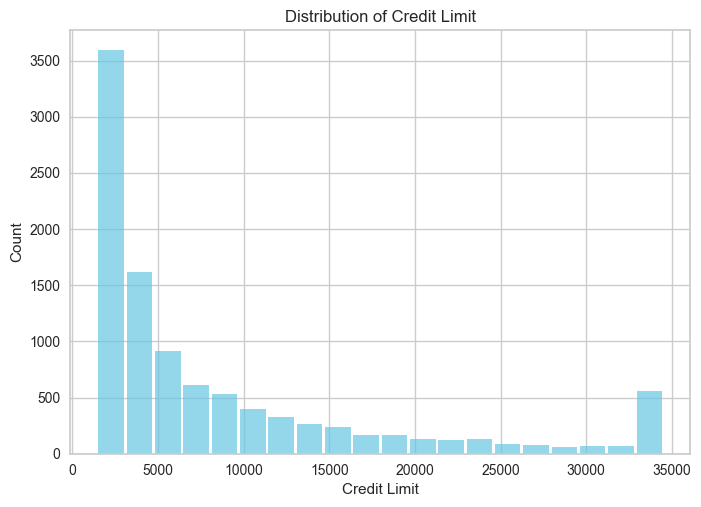

In [14]:
# Distribution of Credit Limit
df['Credit_Limit'].plot.hist(rwidth=0.9, bins=20, color='#67C6E3', alpha=0.7)
plt.xlabel('Credit Limit')
plt.ylabel('Count')
plt.title('Distribution of Credit Limit')
plt.show()


We can observe that most credit limits are less than $5000.

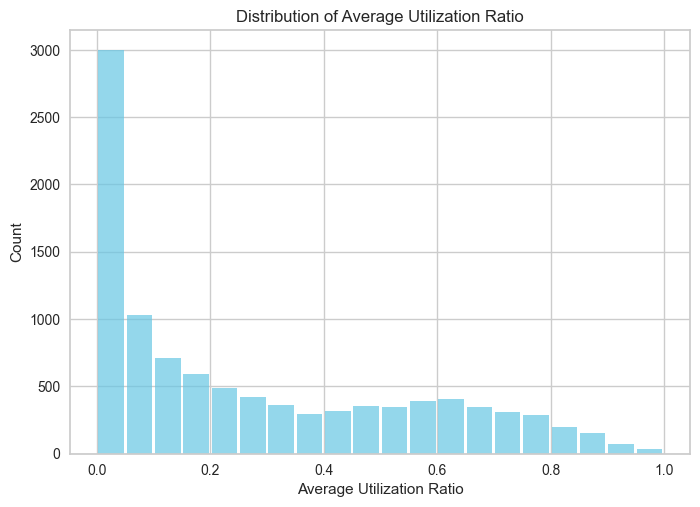

In [15]:
# Distribution of Credit Limit
df['Avg_Utilization_Ratio'].plot.hist(rwidth=0.9, bins=20, color='#67C6E3', alpha=0.7)
plt.xlabel('Average Utilization Ratio')
plt.ylabel('Count')
plt.title('Distribution of Average Utilization Ratio')
plt.show()

We can observe that most Average Utilization Ratio are less than 0.2.

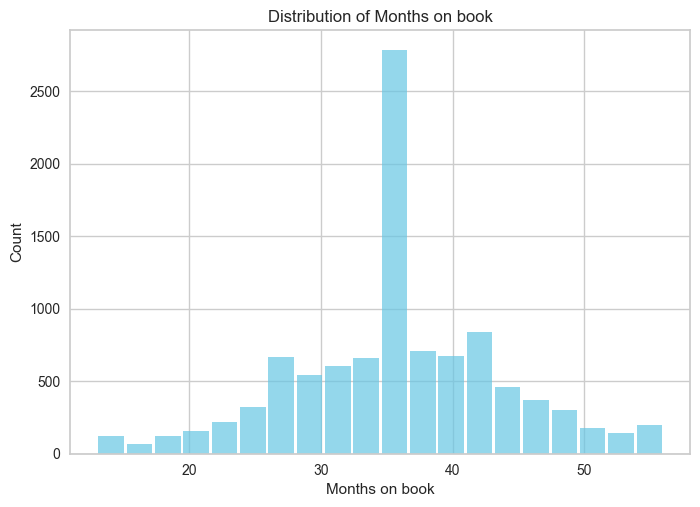

In [16]:
# Distribution of Credit Limit
df['Months_on_book'].plot.hist(rwidth=0.9, bins=20, color='#67C6E3', alpha=0.7)
plt.xlabel('Months on book')
plt.ylabel('Count')
plt.title('Distribution of Months on book')
plt.show()

We observe there is a sudden rise in customer churn in the 37th month

## DATA PREPROCESSING

The following steps are applied to preprocessing the data:

-  Label encoding the categorical features ('Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category')
- Scaling the features using the standard scaler
- Creating a subset dataframe for dimensionality reduction

In [17]:
data = df.copy()

In [18]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [19]:
LE = LabelEncoder()

for i in object_cols:
    data[i] = LE.fit_transform(data[i])
    print(f"Mapping for {i}: {dict(zip(LE.classes_, LE.transform(LE.classes_)))}")

print("All features are now numerical")

Mapping for Attrition_Flag: {'Attrited Customer': 0, 'Existing Customer': 1}
Mapping for Gender: {'F': 0, 'M': 1}
Mapping for Education_Level: {'College': 0, 'Doctorate': 1, 'Graduate': 2, 'High School': 3, 'Post-Graduate': 4, 'Uneducated': 5, 'Unknown': 6}
Mapping for Marital_Status: {'Divorced': 0, 'Married': 1, 'Single': 2, 'Unknown': 3}
Mapping for Income_Category: {'$120K +': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K': 3, 'Less than $40K': 4, 'Unknown': 5}
Mapping for Card_Category: {'Blue': 0, 'Gold': 1, 'Platinum': 2, 'Silver': 3}
All features are now numerical


In [20]:
#Creating a copy of data
ds = data.copy()
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [21]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_mon_1,Naive_Bayes_mon_2
0,0.802878,0.437506,-0.165406,1.059956,0.503368,-0.052637,-0.628128,-0.574182,-0.259473,0.384621,...,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882,-0.437754,0.437763
1,2.156861,0.437506,0.333570,-0.943436,2.043199,-0.597678,0.727306,0.755053,-0.259473,1.010715,...,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276,-0.437854,0.437845
2,-0.682769,0.437506,0.583058,1.059956,0.503368,-0.597678,-0.628128,0.090436,-0.259473,0.008965,...,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155,-0.437952,0.437955
3,0.832862,0.437506,-0.789126,-0.943436,1.273283,-0.052637,2.082739,0.755053,-0.259473,-0.241473,...,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686,-0.437644,0.437654
4,-0.814896,0.437506,-0.789126,1.059956,0.503368,1.037447,-0.628128,-0.574182,-0.259473,-1.869317,...,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155,-0.437950,0.437955


Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

Steps in this section:
- Dimensionality reduction with PCA
- Plotting the reduced dataframe


In [22]:
# initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,10127.0,-1.122611e-17,1.925219,-3.646269,-1.121053,-0.637635,-0.048558,5.872909
col2,10127.0,8.980890e-17,1.765574,-3.001606,-1.263524,-0.448686,0.827878,6.548844
col3,10127.0,4.490445e-17,1.383702,-4.790966,-0.886041,0.054281,0.909479,5.405623


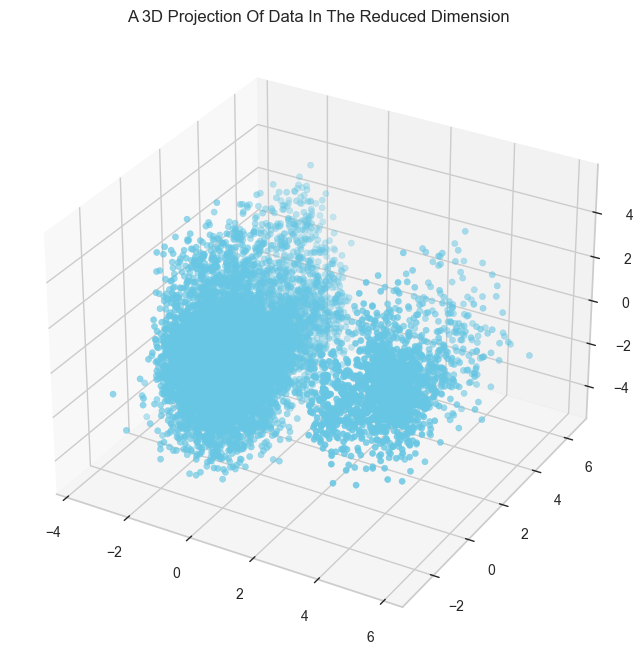

In [23]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="#67C6E3", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed

Elbow Method to determine the number of clusters to be formed:


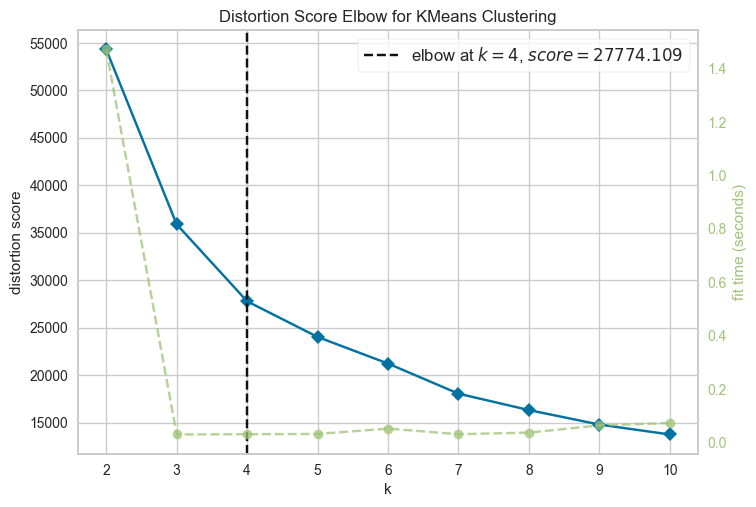

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

The above graph indicates that four will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

In [25]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

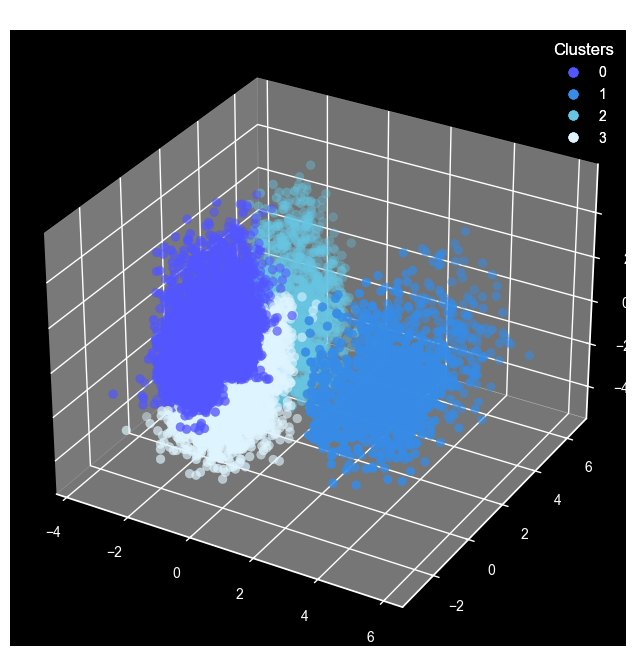

In [26]:
# Color palette
pal = ["#5356FF", "#378CE7", "#67C6E3", "#DFF5FF"]

#Plotting the clusters
fig = plt.figure(figsize=(10, 8))
plt.style.use('dark_background')
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], cmap=ListedColormap(pal), marker='o')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_title("The Plot Of The Clusters")
plt.show()

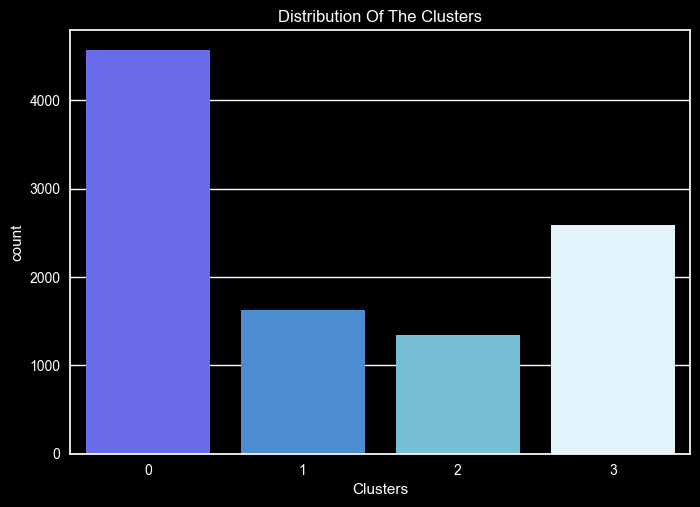

In [27]:
#Plotting countplot of clusters
pal = ["#5356FF","#378CE7", "#67C6E3","#DFF5FF"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

From the above plot, it can be clearly seen that cluster 0 is our biggest set of customers closely followed by cluster 1. We can explore what each cluster is spending on for the targeted marketing strategies.

<Figure size 800x550 with 0 Axes>

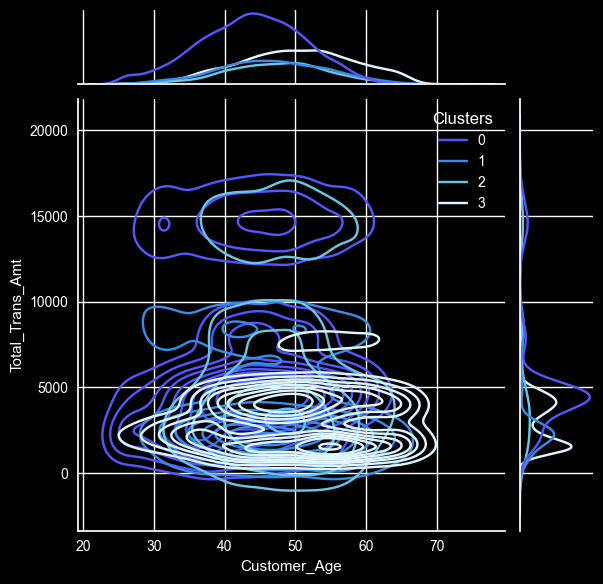

<Figure size 800x550 with 0 Axes>

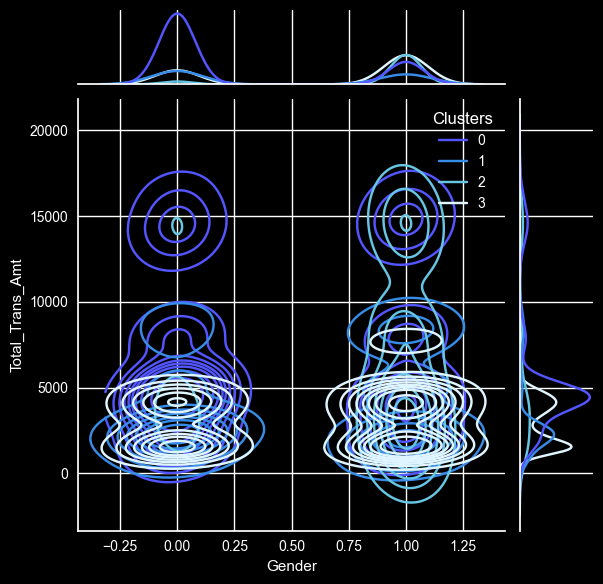

<Figure size 800x550 with 0 Axes>

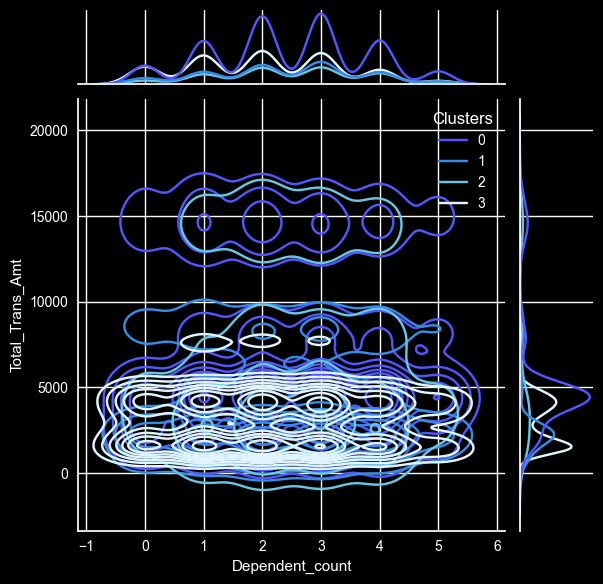

<Figure size 800x550 with 0 Axes>

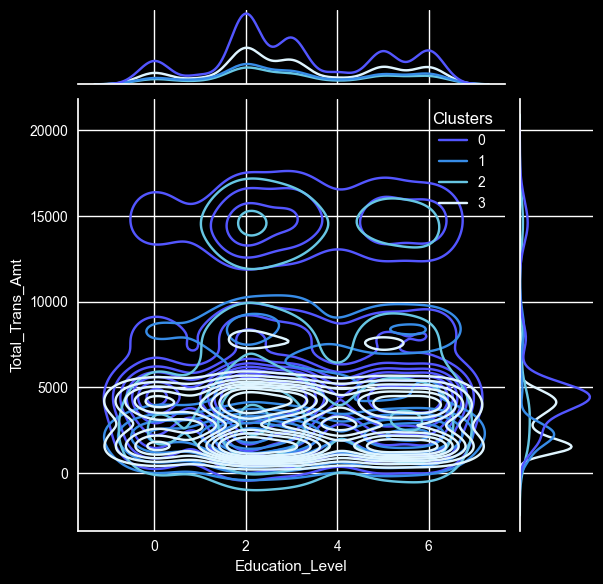

<Figure size 800x550 with 0 Axes>

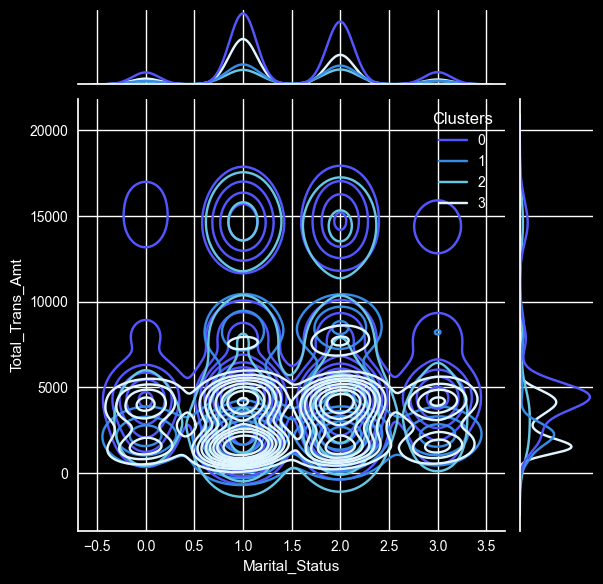

<Figure size 800x550 with 0 Axes>

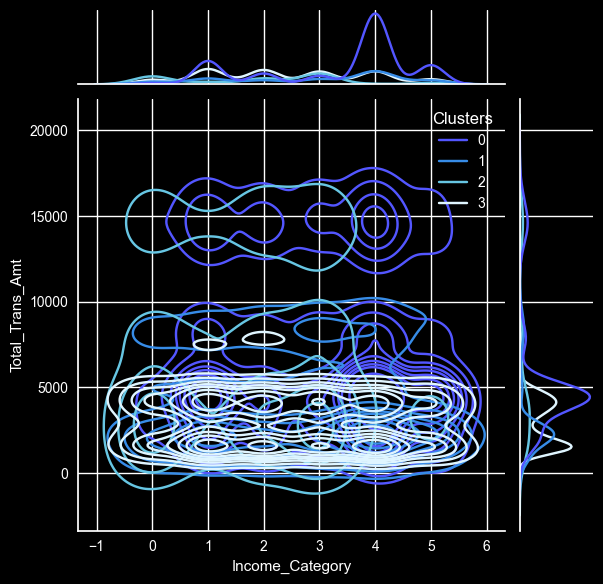

<Figure size 800x550 with 0 Axes>

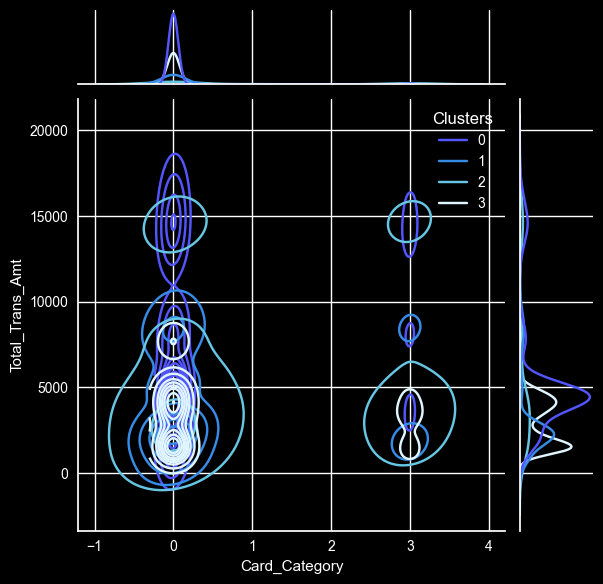

<Figure size 800x550 with 0 Axes>

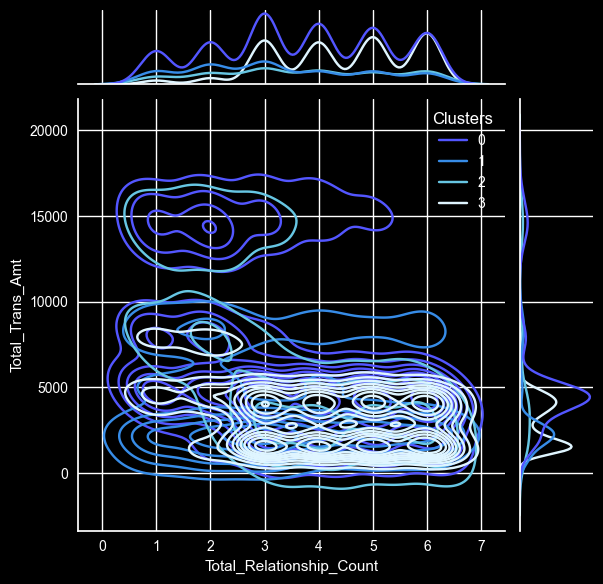

In [28]:
Personal = [ "Customer_Age","Gender", "Dependent_count", "Education_Level", "Marital_Status", "Income_Category", "Card_Category","Total_Relationship_Count"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Total_Trans_Amt"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()

**About Cluster Number 0:**

    The highest number of transactions is between ages 40 and 50.
    Females have conducted the most transactions.
    Their income ranges from $40K to $60K.
    Most of them are graduates or post-graduates.

**About Cluster Number 1:**

    Most of them have transactions lower than 5000.
    Females have conducted the most transactions.
    The dependent count is between 2 and 3.
    Most of them are graduates.

**About Cluster Number 2:**

    Most of them have transactions between 5000 and 10000.
    Males have conducted the most transactions.
    Their income category is $120K.

**About Cluster Number 3:**

    Almost all of them have transactions lower than 10000.
    The ratio of males to females is similar.
    Most of them are married or single.

### Conclusion 

In this customer segmentation, I used unsupervised clustering followed by dimensionality reduction and agglomerative clustering. Then, I used the Elbow Method to determine the number of clusters to be formed and further utilized them in profiling customers.